# Run Any Kind of OLS Regression (ANOVA, GLM, etc.)

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model (e.g., regression or T-tests) on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [58]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/supplement_atrophy_by_disease'

Import Data

In [33]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/updated_with_all_adni/master_dx_updated_fix.csv'
sheet = None

In [34]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [ ]:
data_df.columns

In [37]:
drop_list = ['Visual_Temporal']

In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [41]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 3 # The value to drop if found

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [43]:
# # Remove anything you don't want to standardize
# cols_not_to_standardize = None # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [44]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

In [45]:
# for col in data_df.columns:
#     if 'CSF' and 'eh' not in col:
#         data_df[col] = data_df[col] * -1

# 02 - Compare Distributions Across 2 Categories

In [ ]:
data_df.columns

In [ ]:
from calvin_utils.statistical_utils.kolmogorov_smirnov import pivot_dataframe
pdf = pivot_dataframe(data_df, 'Temporal', 'Rater')
pdf

In [26]:
# from calvin_utils.statistical_utils.kolmogorov_smirnov import ks_test_and_plot_cdf

# ks_test_and_plot_cdf(pdf['Cognitive Neurologist'], pdf['Neurology Resident'], outdir=out_dir)


# 03 - Compare Distributions Across Multiple Categories

In [ ]:
data_df.columns

In [70]:
xlabel = 'Atrophy Grade'
xlim = (0,4)
categories_to_assess_within = ['Visual_Cerebellum']
categories_to_assess_across = ['Diagnosis']

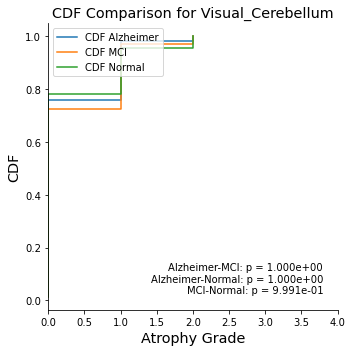

In [71]:
from calvin_utils.statistical_utils.kolmogorov_smirnov import CalvinKolmogorovSmirnov

analysis = CalvinKolmogorovSmirnov(xlim=xlim, xlabel=xlabel)
# Kolmogorov-Smirnov test and CDF plot
ks_results = analysis.orchestrate_ks_tests(data_df, categories_to_assess_within, categories_to_assess_across, out_dir)
